In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import norm
from collections import Counter
from sklearn.model_selection import train_test_split


In [201]:
dataset = pd.read_csv('C:/Users/bahld/python programs/Stats_New/linear regression/Mumbai.csv')

In [202]:
dataset.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,4850000,720,Kharghar,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,1,1,1,1,0,1,1,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
2,6700000,650,Kharghar,1,1,1,1,1,0,1,1,0,0,1,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0
3,4500000,650,Kharghar,1,1,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,1,0
4,5000000,665,Kharghar,1,1,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0


In [203]:
dataset.shape

(7719, 40)

In [204]:
dataset.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,7.719000e+03,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000
mean,1.506165e+07,998.409250,1.913331,0.647105,7.498899,7.473896,7.437881,7.441638,7.439435,7.477005,7.404845,7.402772,7.436067,7.395777,7.404586,7.450188,7.402902,7.537505,7.523254,7.538800,7.426221,7.399275,7.402902,7.402254,7.373105,7.395258,7.382044,7.387097,7.434512,7.518331,7.417930,7.454722,7.372069,7.379712,7.379065,7.373624,7.374530,7.383988,7.374789
std,2.052100e+07,550.967809,0.855376,0.477901,3.197923,3.252095,3.328245,3.320401,3.325002,3.245418,3.396259,3.400471,3.332024,3.414637,3.396786,3.302464,3.400208,3.112033,3.144066,3.109101,3.352445,3.407563,3.400208,3.401522,3.460050,3.415683,3.442233,3.432112,3.335259,3.155041,3.369523,3.292904,3.462108,3.446892,3.448185,3.459020,3.457217,3.438345,3.456702
min,2.000000e+06,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.300000e+06,650.000000,1.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
50%,9.500000e+06,900.000000,2.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,1.700000e+07,1177.000000,2.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,4.200000e+08,8511.000000,7.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [205]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [206]:
dataset.corr().T

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
Price,1.000000,0.299172,0.272048,-0.046493,-0.011882,-0.007093,-0.003388,-0.005336,-0.007419,-0.006354,-0.005695,-0.007531,-0.007612,-0.006783,-0.007883,-0.006319,-0.007548,-0.008210,-0.007400,-0.008136,-0.007753,-0.005452,-0.006609,-0.007594,-0.007141,-0.005282,-0.005197,-0.008019,-0.005098,-0.006345,-0.007462,-0.009311,-0.007356,-0.006855,-0.006431,-0.007113,-0.006888,-0.005310,-0.006503
Area,0.299172,1.000000,0.810016,-0.024114,-0.067163,-0.059166,-0.055341,-0.059304,-0.057962,-0.059207,-0.059026,-0.062115,-0.059300,-0.061308,-0.063283,-0.058730,-0.062782,-0.064072,-0.063205,-0.063432,-0.059459,-0.060741,-0.060698,-0.063081,-0.064569,-0.063521,-0.063425,-0.064851,-0.058101,-0.062248,-0.066685,-0.060530,-0.064727,-0.063139,-0.064299,-0.064861,-0.064830,-0.063748,-0.064410
No. of Bedrooms,0.272048,0.810016,1.000000,-0.113498,-0.026347,-0.018536,-0.016159,-0.020508,-0.018633,-0.019177,-0.019542,-0.022074,-0.019651,-0.021569,-0.023159,-0.018752,-0.022785,-0.023870,-0.023171,-0.023266,-0.020416,-0.021465,-0.021493,-0.023151,-0.024358,-0.023795,-0.023473,-0.024496,-0.019134,-0.021616,-0.025417,-0.021518,-0.024417,-0.023334,-0.024222,-0.024394,-0.024511,-0.023574,-0.024157
Resale,-0.046493,-0.024114,-0.113498,1.000000,-0.110552,-0.121058,-0.124162,-0.127375,-0.126384,-0.117759,-0.125745,-0.121176,-0.124504,-0.124489,-0.122749,-0.122379,-0.122035,-0.118119,-0.119918,-0.117487,-0.122761,-0.121682,-0.125703,-0.121889,-0.119154,-0.120436,-0.117852,-0.119009,-0.127085,-0.121427,-0.112450,-0.123117,-0.119225,-0.121260,-0.118051,-0.119000,-0.119025,-0.117489,-0.118988
MaintenanceStaff,-0.011882,-0.067163,-0.026347,-0.110552,1.000000,0.995929,0.995428,0.995614,0.995777,0.996992,0.996743,0.997379,0.996329,0.997215,0.997113,0.995968,0.997176,0.998232,0.997390,0.998314,0.996483,0.997365,0.996818,0.997177,0.997971,0.996981,0.997788,0.997490,0.995788,0.996912,0.997432,0.996221,0.998045,0.997873,0.997904,0.997928,0.997881,0.997661,0.997830
Gymnasium,-0.007093,-0.059166,-0.018536,-0.121058,0.995929,1.000000,0.998401,0.997343,0.998024,0.995718,0.997854,0.997504,0.997312,0.997842,0.997347,0.998642,0.997341,0.997655,0.996933,0.997740,0.997690,0.997858,0.997705,0.997358,0.997790,0.997068,0.997090,0.997459,0.997858,0.997847,0.997012,0.997034,0.997828,0.997864,0.997193,0.997801,0.997718,0.997034,0.997752
SwimmingPool,-0.003388,-0.055341,-0.016159,-0.124162,0.995428,0.998401,1.000000,0.998251,0.999052,0.997438,0.998470,0.998104,0.998260,0.998303,0.997936,0.998711,0.997924,0.997688,0.997642,0.997723,0.998639,0.997476,0.998256,0.997907,0.998000,0.997390,0.997440,0.997704,0.998649,0.997770,0.995403,0.998297,0.998008,0.998158,0.997503,0.998018,0.997941,0.997452,0.997979
LandscapedGardens,-0.005336,-0.059304,-0.020508,-0.127375,0.995614,0.997343,0.998251,1.000000,0.998341,0.996862,0.998454,0.997941,0.998163,0.998222,0.997873,0.997619,0.997807,0.997593,0.997502,0.997775,0.997909,0.997363,0.998369,0.997825,0.997924,0.997730,0.997359,0.997853,0.998614,0.997702,0.995414,0.998117,0.997945,0.998116,0.997427,0.997941,0.997885,0.997333,0.997911
JoggingTrack,-0.007419,-0.057962,-0.018633,-0.126384,0.995777,0.998024,0.999052,0.998341,1.000000,0.997669,0.998585,0.998357,0.998576,0.998355,0.998200,0.998559,0.998212,0.997854,0.997830,0.997825,0.999147,0.997422,0.998418,0.998172,0.997966,0.997579,0.997410,0.997864,0.998779,0.997826,0.995113,0.998780,0.997997,0.998153,0.997487,0.997973,0.997895,0.997330,0.997932
RainWaterHarvesting,-0.006354,-0.059207,-0.019177,-0.117759,0.996992,0.995718,0.997438,0.996862,0.997669,1.000000,0.997501,0.997635,0.99

In [207]:
#sns.distplot(dataset['Paved_Highways'])

X = dataset.loc[:, dataset.columns != "Price"]
y = dataset.loc[:, dataset.columns == "Price"]
#X=X.drop(['Location'],axis=1)

In [208]:
# Create a dataframe for numeric features
num=X.select_dtypes(include='number')

# Create a dataframe for categorical features
char=X.select_dtypes(include='object')


In [209]:
char_encode=pd.get_dummies(char)

In [210]:
X_all=pd.concat([num,char_encode],axis=1,join='inner')

In [211]:
def data_preprocess(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=0)
    return(X_train, X_test, y_train, y_test)


    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

    scaler.fit(X_train)

    # Now apply the transformations to the data:
    train_scaled = scaler.transform(X_train)
    test_scaled = scaler.transform(X_test)

    
    
    y_train=y_train.astype('int')
    y_test=y_test.astype('int')
    return(train_scaled, test_scaled, y_train, y_test)
   
    

In [212]:
X_all.size


3481269

In [213]:
y.size

7719

In [214]:
#X_all=X

In [215]:
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X_all,y)

In [216]:
X_train=X_train_scaled
X_test=X_test_scaled

In [217]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=24)

In [218]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
print(X_train.shape)
print(y_train.shape)
regressor.fit(X_train, y_train)

(5403, 451)
(5403,)


LinearRegression()

In [219]:
regressor.coef_

array([ 2.67800817e+03,  1.68119983e+06, -1.34038123e+06, -2.45423382e+05,
       -3.79886277e+06,  7.24914719e+06, -7.65130323e+05, -2.57867493e+06,
        3.54672736e+06,  3.41977326e+06, -2.07617993e+06,  1.18157546e+06,
       -1.47997461e+06, -1.54978331e+06, -1.35445141e+06, -1.32071627e+06,
       -4.87820515e+06,  1.28894093e+06, -2.43236527e+06,  6.75841956e+05,
       -1.75674825e+06,  6.57596221e+05,  4.04023234e+06, -2.38748869e+06,
        4.24333605e+05,  1.19691777e+07, -2.65387127e+06,  5.59696759e+05,
        1.24534020e+06,  3.45437619e+06, -4.77204564e+06, -1.78142522e+07,
        4.94716878e+06, -6.45432181e+06,  4.98069955e+06,  2.66816777e+06,
        8.53670998e+04,  5.31907466e+06, -4.62928846e+15, -1.38542206e+15,
       -3.54491864e+16, -1.38542183e+15, -1.38542207e+15, -2.90334599e+16,
       -1.38542205e+15, -1.38542209e+15, -1.38542208e+15, -1.38542207e+15,
       -1.38542205e+15, -1.38542208e+15, -1.38542207e+15, -1.38542206e+15,
       -1.38542206e+15, -

In [220]:
coeff_df = pd.DataFrame(regressor.coef_, X_all.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Area,2.678008e+03
No. of Bedrooms,1.681200e+06
Resale,-1.340381e+06
MaintenanceStaff,-2.454234e+05
Gymnasium,-3.798863e+06
...,...
Location_vasant vihar thane west,-1.385422e+15
Location_vile parle west,-1.385422e+15
Location_vrindavan society,0.000000e+00
Location_worli sea Fase,0.000000e+00


In [221]:
regressor.intercept_

1385422084712400.5

In [222]:
y_pred = regressor.predict(X_train)
print(y_train)
df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred})
df

[ 4600000  9496000 16399999 ... 11500000  5300000  4700000]


,Actual,Predicted
0,4600000,11473280.00
1,9496000,10096997.50
2,16399999,19366094.00
3,12600000,10022715.25
4,11100000,13152370.75
...,...,...
5398,11299999,12764331.00
5399,6500000,15136168.50
5400,11500000,21138216.50
5401,5300000,7141402.00


Text(0, 0.5, 'Residuals')

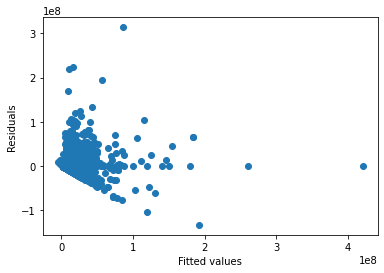

In [223]:
# Validating OLS Assumptions
plt.scatter(y_pred, (y_train-y_pred))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

In [224]:
(y_train-y_pred).mean()

-0.07667036831389969

Text(0.5, 0, 'Residuals')

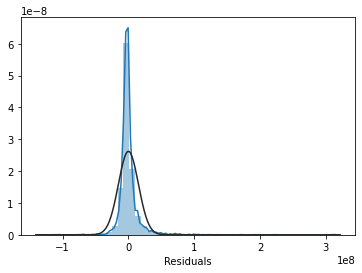

In [225]:
sns.distplot(y_train-y_pred , fit=norm);
plt.xlabel('Residuals')

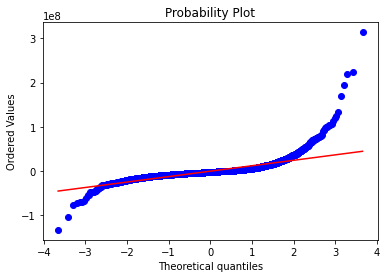

In [226]:
from scipy import stats
stats.probplot(y_train-y_pred, plot=plt)
plt.show()

In [227]:
import statsmodels.api as sm

In [228]:
# Unlike sklearn that adds an intercept to our data for the best fit, statsmodel doesn't. We need to add it ourselves
# Remember, we want to predict the price based off our features.
# X represents our predictor variables, and y our predicted variable.
# We need now to add manually the intercepts
X_endog = sm.add_constant(X_train)

In [229]:
res = sm.OLS(y_train, X_endog)
res.fit()

In [230]:
res.fit().summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     9.803
Date:                Wed, 27 Jan 2021   Prob (F-statistic):               0.00
Time:                        02:10:37   Log-Likelihood:                -97016.
No. Observations:                5403   AIC:                         1.948e+05
Df Residuals:                    5008   BIC:                         1.974e+05
Df Model:                         394                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                            2.023e+07   2.89e+06      7.009      0.000    1.46e+07    2.59e+07
Area                                             2678.0082    759.926      3.524      0.000    1188.220    4167.796
No. of Bedrooms                                  1.681e+06   4.88e+05      3.448      0.001    7.25e+05    2.64e+06
Resale                                           -1.34e+06   5.63e+05     -2.381      0.017   -2.44e+06   -2.37e+05
MaintenanceStaff                                -2.454e+05   1.74e+06     -0.141      0.888   -3.65e+06    3.16e+06
Gymnasium                                       -3.799e+06   2.46e+06     -1.541      0.123   -8.63e+06    1.03e+06
SwimmingPool                                     7.249e+06   2.47e+06      2.937      0.003    2.41e+06    1.21e+07
LandscapedGardens                               -7.651e+05   1.73e+06     -0.442      0.659   -4.16e+06    2.63e+06
JoggingTrack                                    -2.579e+06   2.72e+06     -0.946      0.344   -7.92e+06    2.76e+06
RainWaterHarvesting                              3.547e+06   1.96e+06      1.807      0.071      -3e+05    7.39e+06
IndoorGames                                       3.42e+06   2.02e+06      1.692      0.091   -5.42e+05    7.38e+06
ShoppingMall                                    -2.076e+06   2.85e+06     -0.728      0.467   -7.67e+06    3.51e+06
Intercom                                         1.182e+06   1.89e+06      0.626      0.531   -2.52e+06    4.88e+06
SportsFacility                                   -1.48e+06   2.14e+06     -0.690      0.490   -5.68e+06    2.72e+06
ATM                                              -1.55e+06   3.94e+06     -0.393      0.694   -9.28e+06    6.18e+06
ClubHouse                                       -1.354e+06   2.02e+06     -0.670      0.503   -5.32e+06    2.61e+06
School                                          -1.321e+06   5.25e+06     -0.252      0.801   -1.16e+07    8.97e+06
24X7Security                                    -4.878e+06   3.28e+06     -1.487      0.137   -1.13e+07    1.55e+06
PowerBackup                                      1.289e+06   2.72e+06      0.474      0.635   -4.04e+06    6.62e+06
CarParking                                      -2.432e+06   3.59e+06     -0.678      0.498   -9.46e+06     4.6e+06
StaffQuarter                                     6.758e+05   2.35e+06      0.288      0.773   -3.92e+06    5.27e+06
Cafeteria                                       -1.757e+06   2.49e+06     -0.707      0.480   -6.63e+06    3.12e+06
MultipurposeRoom                                 6.576e+05   1.99e+06      0.331      0.741   -3.24e+06    4.55e+06
Hospital                                          4.04e+06   5.43e+

In [232]:
# Model evaluation metrics - Regression problems

y_pred1 = regressor.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

Mean Absolute Error: 66525609046200.984
Mean Squared Error: 8.948197715840598e+29
Root Mean Squared Error: 945949137947733.4


In [186]:
pd.set_option('max_columns', None)
X_all

#SportsFacility,PowerBackup,Cafeteria,Gasconnection,VaastuCompliant,


#maintaninence staff,gymnsium,landscapedgardens,rainwaterharvesting,indoorgames,shoppingmall,intercom,atm,clubhouse,school,24*7security
#carparking,staffquarter,multipurposeroom,hospital,washingmachine,ac,wifi,childrenpalayarea,liftavailable,bed,golfcourse,tv,
#diningtable,sofa,wardrobe,refrigeratorX_

,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,720,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1,600,1,1,1,1,1,0,1,1,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
2,650,1,1,1,1,1,0,1,1,0,0,1,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0
3,650,1,1,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,1,0
4,665,1,1,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7714,1180,2,0,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
7715,530,1,1,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
7716,700,1,0,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
7717,995,2,0,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9


In [187]:
#dataset['interaction_term']=dataset['Area']*dataset['No. of Bedrooms']

In [238]:
#Removed variables with p value >0.05
#X = dataset.loc[:,['Area','Location','No. of Bedrooms','Resale','SwimmingPool','AC','VaastuCompliant']]
X = dataset.loc[:,['Area','No. of Bedrooms','Gymnasium','SwimmingPool','AC','VaastuCompliant','TV','Refrigerator','Location']]




y = dataset.loc[:, dataset.columns == "Price"]

In [239]:
# Create a dataframe for numeric features
num=X.select_dtypes(include='number')

# Create a dataframe for categorical features
char=X.select_dtypes(include='object')


In [240]:
char_encode=pd.get_dummies(char)

In [241]:
X_all=pd.concat([num,char_encode],axis=1,join='inner')

In [192]:
#X_all=X

In [242]:


X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X_all,y)

In [243]:
X_train=X_train_scaled
X_test=X_test_scaled
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [244]:
regressor.coef_

array([ 2.51443860e+03,  1.94072497e+06, -5.36279684e+06,  7.45068259e+06,
        1.47144817e+07, -5.26437062e+06, -1.08261561e+07, -1.14846319e+06,
       -1.21205763e+15, -5.34207478e+14, -3.74596655e+15, -5.34207244e+14,
       -5.34207488e+14,  5.71116462e+14, -5.34207468e+14, -5.34207500e+14,
       -5.34207491e+14, -5.34207489e+14, -5.34207465e+14, -5.34207492e+14,
       -5.34207488e+14, -5.34207480e+14, -5.34207480e+14, -5.34207471e+14,
       -5.34207491e+14, -5.34207478e+14, -5.34207495e+14, -5.34207493e+14,
       -5.34207491e+14, -5.34207492e+14, -5.34207493e+14, -5.34207448e+14,
       -5.34207501e+14, -5.34207465e+14, -5.34207492e+14, -5.34207489e+14,
       -5.34207469e+14,  5.36077317e+14, -5.34207482e+14, -5.34207489e+14,
       -5.34207491e+14, -5.34207495e+14, -5.34207492e+14, -5.34207491e+14,
       -5.34207491e+14, -5.34207476e+14, -5.34207486e+14, -5.34207484e+14,
       -5.34207451e+14, -5.34207469e+14, -5.34207486e+14, -5.34207462e+14,
       -5.34207482e+14, -

In [245]:
X_endog = sm.add_constant(X_train)

In [246]:
res = sm.OLS(y_train, X_endog)
res.fit()

In [247]:
res.fit().summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     10.48
Date:                Wed, 27 Jan 2021   Prob (F-statistic):               0.00
Time:                        02:58:01   Log-Likelihood:                -97038.
No. Observations:                5403   AIC:                         1.948e+05
Df Residuals:                    5038   BIC:                         1.972e+05
Df Model:                         364                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                             1.73e+07   1.22e+06     14.128      0.000    1.49e+07    1.97e+07
Area                                             2514.4380    751.184      3.347      0.001    1041.790    3987.086
No. of Bedrooms                                  1.941e+06    4.8e+05      4.047      0.000       1e+06    2.88e+06
Gymnasium                                       -5.363e+06   1.67e+06     -3.206      0.001   -8.64e+06   -2.08e+06
SwimmingPool                                     7.451e+06   1.89e+06      3.936      0.000    3.74e+06    1.12e+07
AC                                               1.471e+07   4.04e+06      3.646      0.000     6.8e+06    2.26e+07
VaastuCompliant                                 -5.264e+06   1.56e+06     -3.376      0.001   -8.32e+06   -2.21e+06
TV                                              -1.083e+07   4.55e+06     -2.379      0.017   -1.97e+07   -1.91e+06
Refrigerator                                    -1.148e+06   2.94e+06     -0.391      0.696   -6.91e+06    4.61e+06
Location_15th Road                                 -0.0008   8.54e-05     -9.461      0.000      -0.001      -0.001
Location_4 Bunglows                               2.42e+06   1.12e+07      0.216      0.829   -1.95e+07    2.43e+07
Location_Adaigaon                                  -0.0016      0.000     -8.906      0.000      -0.002      -0.001
Location_Agripada                                2.359e+08   1.58e+07     14.929      0.000    2.05e+08    2.67e+08
Location_Airoli                                 -8.065e+06   3.77e+06     -2.138      0.033   -1.55e+07    -6.7e+05
Location_Akurli Nagar                            9.492e-05   1.42e-05      6.680      0.000    6.71e-05       0.000
Location_Almeida Park                            1.179e+07   1.58e+07      0.747      0.455   -1.92e+07    4.27e+07
Location_Ambarnath                              -2.037e+07   1.59e+07     -1.285      0.199   -5.14e+07    1.07e+07
Location_Ambernath East                         -1.114e+07   4.43e+06     -2.518      0.012   -1.98e+07   -2.47e+06
Location_Ambernath West                         -8.729e+06   4.27e+06     -2.044      0.041   -1.71e+07   -3.57e+05
Location_Ambivali                                  1.5e+07   1.58e+07      0.950      0.342   -1.59e+07    4.59e+07
Location_Ambivli                                -1.242e+07   1.58e+07     -0.787      0.431   -4.34e+07    1.85e+07
Location_Anand Nagar Thane West                 -7.594e+06   1.58e+07     -0.481      0.630   -3.85e+07    2.33e+07
Location_Andheri                                -7573.2179   5.04e+06     -0.002      0.999   -9.88e+06    9.87e+06
Location_Andheri East                            -1.44e+05   1.95e+

In [248]:
# Model evaluation metrics - Regression problems

y_pred1 = regressor.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

Mean Absolute Error: 16924955434783.986
Mean Squared Error: 1.3506936442292006e+28
Root Mean Squared Error: 116219346247911.78


In [ ]:
#y_pred1 = res.fit().predict(X_test)


In [ ]:
y_test